# The orbit of the Large Magellanic Cloud in the presence of dynamical friction
## Test between Dynamigal and [Galpy](https://docs.galpy.org/en/v1.11.0/orbit.html#example-the-orbit-of-the-large-magellanic-cloud-in-the-presence-of-dynamical-friction)

In [1]:
using TestEnv
TestEnv.activate()

"/tmp/jl_BB5cKC/Project.toml"

In [2]:
using Dynamigal
using Test
using PythonCall
using CairoMakie
using BenchmarkTools

In [3]:
# pyimport("sys")."path".append("")
# pyimport("sys")."path".append("../python")
# accelerations_py = pyimport("accelerations")
au = pyimport("astropy.units")
gp = pyimport("galpy.potential")
go = pyimport("galpy.orbit")
np = pyimport("numpy")

Python: <module 'numpy' from '/home/mmestre/.conda/envs/cosmos/lib/python3.11/site-packages/numpy/__init__.py'>

In [4]:
o = go.Orbit.from_name("LMC")
pot_g = gp.MWPotential2014

Python: [<galpy.potential.PowerSphericalPotentialwCutoff.PowerSphericalPotentialwCutoff object at 0x7f34775155d0>, <galpy.potential.MiyamotoNagaiPotential.MiyamotoNagaiPotential object at 0x7f347df8e610>, <galpy.potential.TwoPowerSphericalPotential.NFWPotential object at 0x7f347af83510>]

In [ ]:
pot_g[2]._amp *= 1.5 # just once per session

Python: 7.278345800291998

In [8]:
ts= np.linspace(0.,-10.,1001)*au.Gyr
o.integrate(ts,pot_g)
t = pyconvert(Vector{Float64},o.time().value)
r = pyconvert(Vector{Float64},o.r(o.time()));

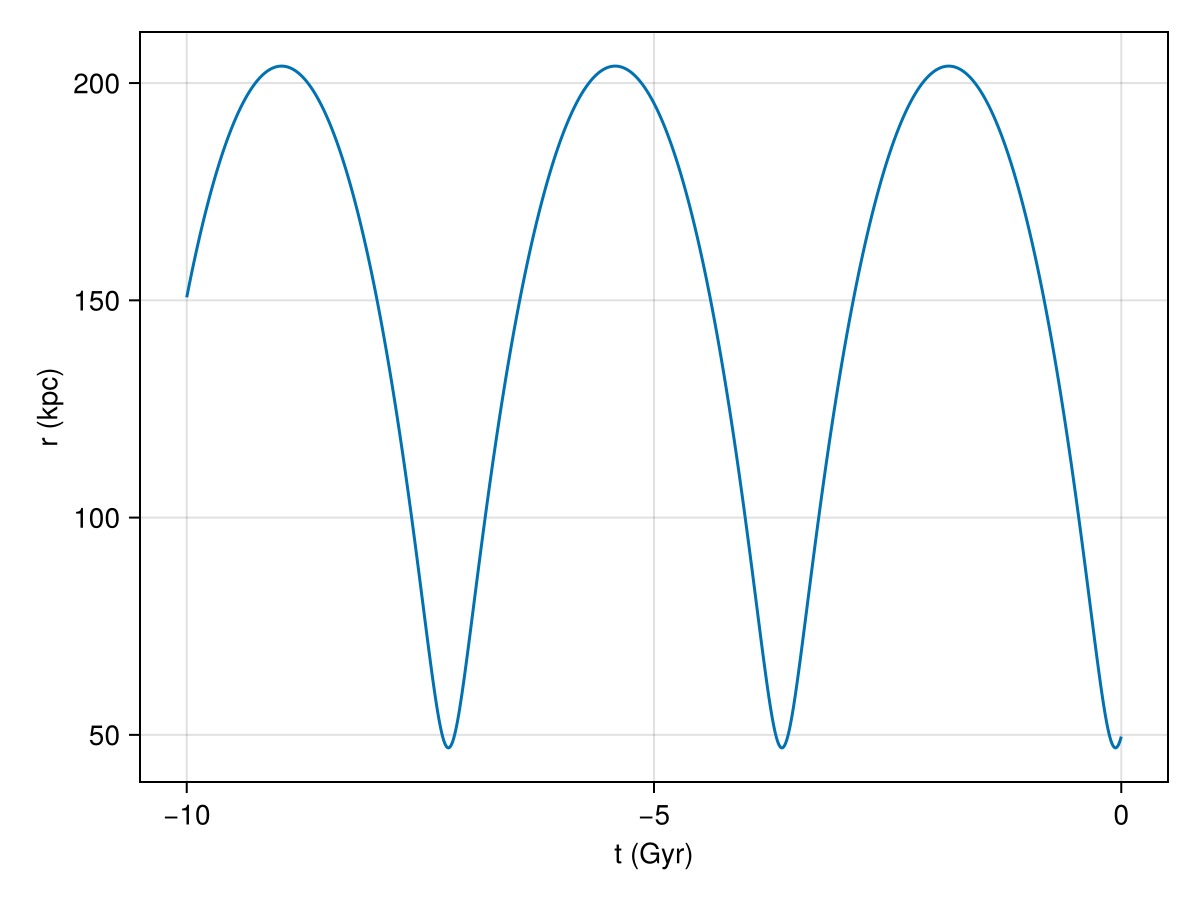

In [9]:
f = Figure()
ax = Axis(f[1,1], xlabel="t (Gyr)", ylabel="r (kpc)")
lines!(ax, t,r)
f

### Shalió igualito a tutorial de [Galpy](https://docs.galpy.org/en/v1.11.0/orbit.html#example-the-orbit-of-the-large-magellanic-cloud-in-the-presence-of-dynamical-friction)!!! 😺
porque es exactamente el código Galpy llamado desde Julia. Ahora veremos que pasa con Dynamigal ...

In [16]:
pot = MilkyWayBovy2014(1.5);


In [21]:
o.vx().value

Python: 57.126829226194225